In [58]:
import sqlite3
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as axs

sns.set()


import scipy.stats as stats

from turtle import color
# %load_ext nb_black
%load_ext lab_black

In [59]:
# make queries

# Create a SQL connection to our SQLite database
con = sqlite3.connect(
    "/home/angelo/Documents/Uni/Courses/Data Managment & Ethics/Integrated Assignment/assignemnet_project_folder/database/assignment_db_2"
)

cur = con.cursor()

In [166]:
# overall crime reduction of total crimes committed
q1_part1 = """
SELECT Year, CrimesCommitted , 
	ROUND(((CrimesCommitted - LAG(CrimesCommitted) OVER (ORDER BY Year))/ CAST(LAG(CrimesCommitted) OVER (ORDER BY Year) AS REAL)), 4) * 100 AS PctChangetoPrevYear
FROM   
(SELECT Year, Month, COUNT(* ) AS CrimesCommitted FROM  view_convenient_time
GROUP BY Year);
"""

df_q1_part1 = pd.read_sql_query(q1_part1, con)

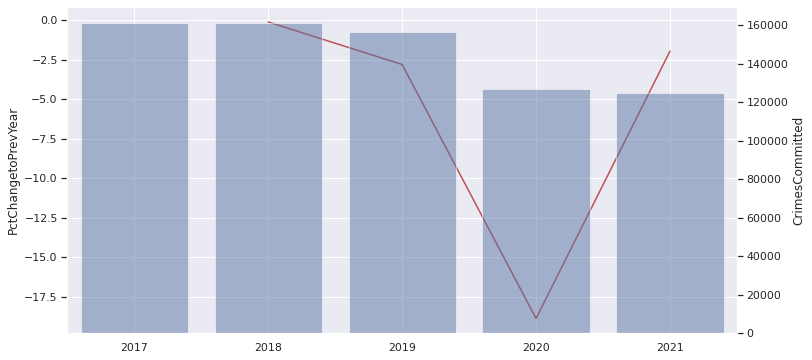

In [167]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})


ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_q1_part1.PctChangetoPrevYear, ax=ax1, color="r")
ax2 = ax1.twinx()

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)
sns.barplot(
    data=df_q1_part1, x="Year", y="CrimesCommitted", color="b", alpha=0.5, ax=ax2
)


plt.savefig("q1_part1.png")

In [168]:
# then report the resouce intensive crimes how theybehaved
q1_part2 = """
SELECT Year, PrimaryCategory, CrimeCountCurrentYear, ROUND(CAST((CrimeCountCurrentYear - LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory)) AS REAL) / CAST(LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory) AS REAL) * 100, 4) AS PCTChange
FROM
(SELECT DISTINCT vct.Year, ct.PrimaryCategory, COUNT (*) OVER( PARTITION BY ct.PrimaryCategory, Year ORDER BY ct.PrimaryCategory) AS CrimeCountCurrentYear 
FROM view_resource_crimes vrc JOIN CrimeType AS ct ON vrc.PrimaryCategory == ct.PrimaryCategory JOIN view_convenient_time as vct ON vct.IUCR == ct.IUCR 
WHERE vrc.ProportionArrested > 50 AND vrc.TotalCommitted >= 500);
"""

df_q1_part2 = pd.read_sql_query(q1_part2, con)

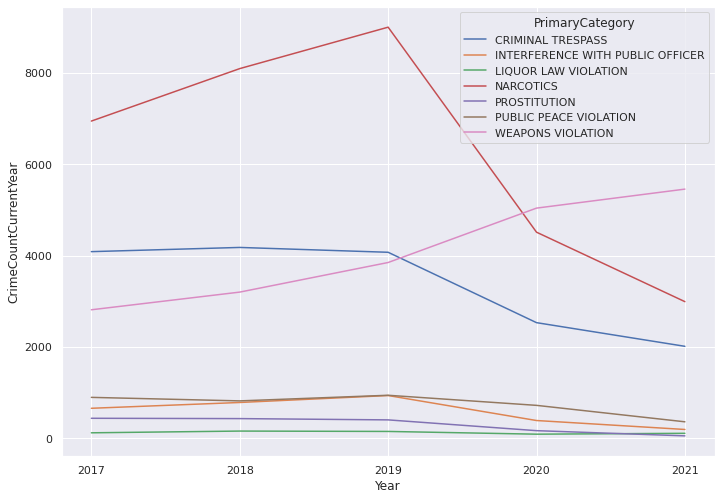

In [169]:
sns.lineplot(
    data=df_q1_part2,
    x="Year",
    y="CrimeCountCurrentYear",
    hue="PrimaryCategory",
)
plt.savefig("q1_part2.png")

In [170]:
# then mention the crime category that showed the largest reduction among all crimes
# top 5 biggest reductions
q1_part3a = """
-- calculate the category with the total largest percentage drop over all 5 years by ranking the crime!
SELECT  DISTINCT PrimaryCategory,PCTChange, Dense_RANK () OVER(ORDER BY PCTChange ASC) AS CrimeWithLargestReduction
FROM
(SELECT Year, PrimaryCategory, CrimeCountCurrentYear, ROUND(CAST((CrimeCountCurrentYear - LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory)) AS REAL) / CAST(LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory) AS REAL) * 100, 4)
 AS PCTChange
FROM
(SELECT DISTINCT vct.Year, ct.PrimaryCategory, COUNT (*) OVER( PARTITION BY PrimaryCategory, Year ORDER BY PrimaryCategory) AS CrimeCountCurrentYear 
FROM view_convenient_time as vct JOIN CrimeType AS ct
ON vct.IUCR == ct.IUCR
WHERE Year == '2017' OR Year == '2021'))
WHERE PCTChange NOT NULL
LIMIT 5;
"""

df_q1_part3a = pd.read_sql_query(q1_part3a, con)

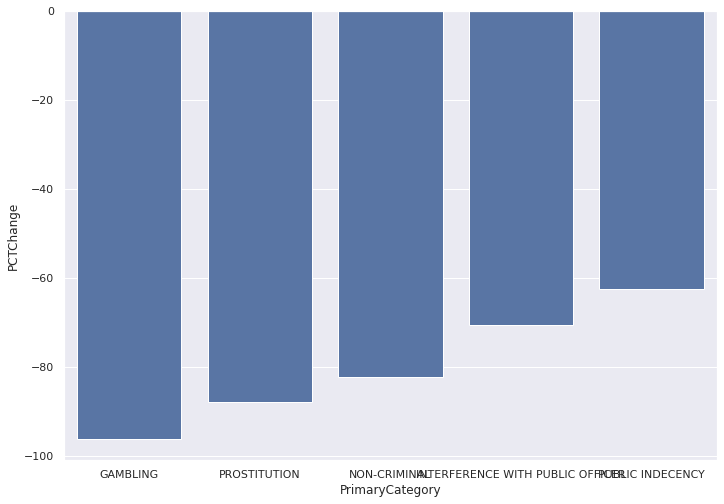

In [171]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.barplot(data=df_q1_part3a, x="PrimaryCategory", y="PCTChange", color="b")
plt.savefig("q1_part3a.png")

In [172]:
# then mention the crime category that showed the largest reduction among all crimes
# top 5 biggest increases
q1_part3b = """
-- calculate the category with the total largest percentage drop over all 5 years by ranking the crime!
SELECT  DISTINCT PrimaryCategory,PCTChange, Dense_RANK () OVER(ORDER BY PCTChange DESC) AS CrimeWithLargestReduction
FROM
(SELECT Year, PrimaryCategory, CrimeCountCurrentYear, ROUND(CAST((CrimeCountCurrentYear - LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory)) AS REAL) / CAST(LAG(CrimeCountCurrentYear) OVER (PARTITION BY PrimaryCategory) AS REAL) * 100, 4)
 AS PCTChange
FROM
(SELECT DISTINCT vct.Year, ct.PrimaryCategory, COUNT (*) OVER( PARTITION BY PrimaryCategory, Year ORDER BY PrimaryCategory) AS CrimeCountCurrentYear 
FROM view_convenient_time as vct JOIN CrimeType AS ct
ON vct.IUCR == ct.IUCR
WHERE Year == '2017' OR Year == '2021'))
WHERE PCTChange NOT NULL
LIMIT 5;
"""

df_q1_part3b = pd.read_sql_query(q1_part3b, con)

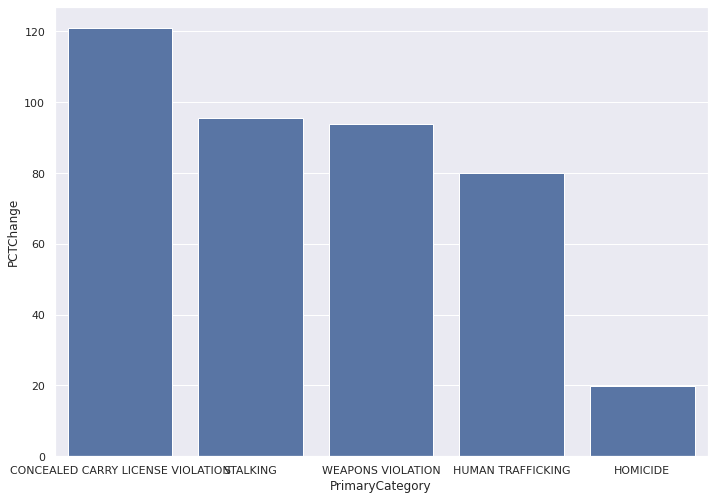

In [173]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.barplot(data=df_q1_part3b, x="PrimaryCategory", y="PCTChange", color="b")
plt.savefig("q1_part3b.png")

In [ ]:
con.close()